# Paper 1 Figures

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.stats import wasserstein_distance


In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

In [3]:
ROOT_RESULTS = '/mnt/storage/ashley/paper1_models'

In [4]:
def estimate_surf_vol(x_range: tuple, y_range: tuple, z_array: np.array):
    assert len(z_array.shape) == 2, 'z_array is not 2D'
    num_x_steps, num_y_steps = z_array.shape

    x_min, x_max = x_range
    y_min, y_max = y_range

    x_interval = np.linspace(x_min, x_max, num_x_steps, endpoint=True)
    y_interval = np.linspace(y_min, y_max, num_y_steps, endpoint=True)

    z_vol = np.trapz(x_interval, np.trapz(y_interval, z_array))

    return z_vol

def move_landscape_to_cpu(gpu_loss_landscape):
    cpu_loss_landscape = []

    for row in gpu_loss_landscape:
        tmp_row = []
        for itm in row:
            itm = (float(itm[7:-1]))
            tmp_row.append(itm)
        cpu_loss_landscape.append(tmp_row)
    return cpu_loss_landscape

In [5]:
bandgap_F_id_ll = pd.read_csv(os.path.join(ROOT_RESULTS, 'bandgap_F_final/20250217145820_bandgap_F_id_loss_landscape.csv')).values
bandgap_F_ood_ll = pd.read_csv(os.path.join(ROOT_RESULTS, 'bandgap_F_final/20250217145820_bandgap_F_ood_loss_landscape.csv')).values
bandgap_F_train_ll = pd.read_csv(os.path.join(ROOT_RESULTS, 'bandgap_F_final/20250217145820_bandgap_F_train_loss_landscape.csv')).values
bandgap_F_id_uncertainty = pd.read_csv(os.path.join(ROOT_RESULTS, 'bandgap_F_final/20250217145820_bandgap_F_50_id_pred.csv')).values
bandgap_F_ood_uncertainty = pd.read_csv(os.path.join(ROOT_RESULTS, 'bandgap_F_final/20250217145820_bandgap_F_50_ood_pred.csv')).values

bandgap_Fe_id_ll = pd.read_csv(os.path.join(ROOT_RESULTS, 'bandgap_Fe_final/20250217192052_bandgap_Fe_id_loss_landscape.csv')).values
bandgap_Fe_ood_ll = pd.read_csv(os.path.join(ROOT_RESULTS, 'bandgap_Fe_final/20250217192052_bandgap_Fe_ood_loss_landscape.csv')).values
bandgap_Fe_train_ll = pd.read_csv(os.path.join(ROOT_RESULTS, 'bandgap_Fe_final/20250217192052_bandgap_Fe_train_loss_landscape.csv')).values
bandgap_Fe_id_uncertainty = pd.read_csv(os.path.join(ROOT_RESULTS, 'bandgap_Fe_final/20250217192052_bandgap_Fe_50_id_pred.csv')).values
bandgap_Fe_ood_uncertainty = pd.read_csv(os.path.join(ROOT_RESULTS, 'bandgap_Fe_final/20250217192052_bandgap_Fe_50_ood_pred.csv')).values

eform_F_id_ll = pd.read_csv(os.path.join(ROOT_RESULTS, 'e_form_F/e_form_F_id_loss_landscape.csv')).values
eform_F_ood_ll = pd.read_csv(os.path.join(ROOT_RESULTS, 'e_form_F/e_form_F_ood_loss_landscape.csv')).values
eform_F_train_ll = pd.read_csv(os.path.join(ROOT_RESULTS, 'e_form_F/20250218022029_e_form_F_train_loss_landscape.csv')).values
eform_F_id_uncertainty = (pd.read_csv(os.path.join(ROOT_RESULTS, 'e_form_F/20250218022029_e_form_F_50_id_pred.csv')).values)
eform_F_ood_uncertainty = (pd.read_csv(os.path.join(ROOT_RESULTS, 'e_form_F/20250218022029_e_form_F_50_ood_pred.csv')).values)

eform_Fe_id_ll = pd.read_csv(os.path.join(ROOT_RESULTS, 'e_form_Fe/e_form_Fe_id_loss_landscape.csv')).values
eform_Fe_ood_ll = pd.read_csv(os.path.join(ROOT_RESULTS, 'e_form_Fe/e_form_Fe_ood_loss_landscape.csv')).values
eform_Fe_train_ll = pd.read_csv(os.path.join(ROOT_RESULTS, 'e_form_Fe/20250218000930_e_form_Fe_train_loss_landscape.csv')).values
eform_Fe_id_uncertainty = (pd.read_csv(os.path.join(ROOT_RESULTS, 'e_form_Fe/20250218000930_e_form_Fe_50_id_pred.csv')).values)
eform_Fe_ood_uncertainty = (pd.read_csv(os.path.join(ROOT_RESULTS, 'e_form_Fe/20250218000930_e_form_Fe_50_ood_pred.csv')).values)


In [6]:
eform_Fe_id_std = np.std(eform_Fe_id_uncertainty[:, 1:], axis=0)
eform_Fe_ood_std = np.std(eform_Fe_ood_uncertainty[:, 1:], axis=0)

eform_F_id_std = np.std(eform_F_id_uncertainty[:, 1:], axis=0)
eform_F_ood_std = np.std(eform_F_ood_uncertainty[:, 1:], axis=0)

bgap_Fe_id_std = np.std(bandgap_Fe_id_uncertainty[:, 1:], axis=0)
bgap_Fe_ood_std = np.std(bandgap_Fe_ood_uncertainty[:, 1:], axis=0)

bgap_F_id_std = np.std(bandgap_F_id_uncertainty[:, 1:], axis=0)
bgap_F_ood_std = np.std(bandgap_F_ood_uncertainty[:, 1:], axis=0)

eform_Fe_id_hist, eform_Fe_id_bins = np.histogram(eform_Fe_id_std, bins=100, density=True)
eform_Fe_ood_hist, eform_Fe_ood_bins = np.histogram(eform_Fe_ood_std, bins=100, density=True)

eform_F_id_hist, eform_F_id_bins = np.histogram(eform_F_id_std, bins=100, density=True)
eform_F_ood_hist, eform_F_ood_bins = np.histogram(eform_F_ood_std, bins=100, density=True)

bandgap_Fe_id_hist, bandgap_Fe_id_bins = np.histogram(bgap_Fe_id_std, bins=100, density=True)
bandgap_Fe_ood_hist, bandgap_Fe_ood_bins = np.histogram(bgap_Fe_ood_std, bins=100, density=True)

bandgap_F_id_hist, bandgap_F_id_bins = np.histogram(bgap_F_id_std, bins=100, density=True)
bandgap_F_ood_hist, bandgap_F_ood_bins = np.histogram(bgap_F_ood_std, bins=100, density=True)

In [7]:
cbar_min = 0
cbar_max = 5
cmap_name = 'jet'
y_tick_labels = ['0', '1', '2', '3', '4', '>5']

# Bandgap F

1.1731080031189067
1.223486851270303
2.230814095543521


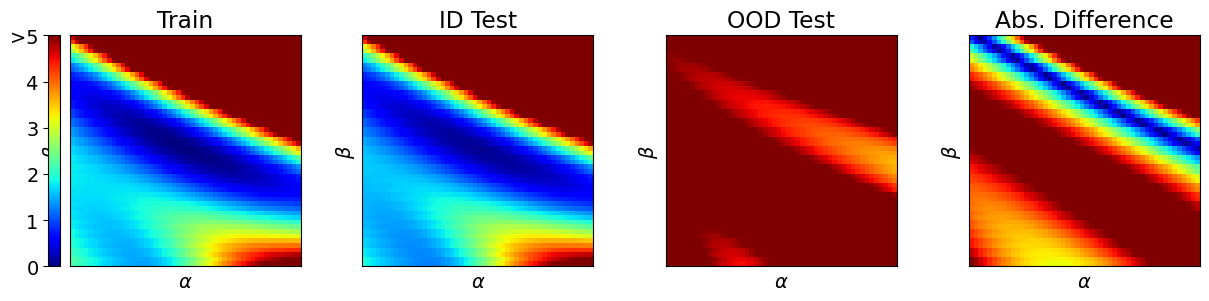

In [8]:
fig, ax = plt.subplots(1, 4, figsize=(15,3))

####

ax[0].imshow(bandgap_F_train_ll[:, 1:], origin='lower', cmap=cmap_name, vmin=cbar_min, vmax=cbar_max)
ax[0].set_title('Train')
ax[0].set_xticks(())
ax[0].set_yticks(())
ax[0].set_xlabel(r'$\alpha$')
ax[0].set_ylabel(r'$\beta$')
print(estimate_surf_vol(x_range=(-0.5, 0.5), y_range=(-0.5, 0.5), z_array=bandgap_F_train_ll[:, 1:]))

ax[1].imshow(bandgap_F_id_ll[:, 1:], origin='lower', cmap=cmap_name, vmin=cbar_min, vmax=cbar_max)
ax[1].set_title('ID Test')
ax[1].set_xticks(())
ax[1].set_yticks(())
ax[1].set_xlabel(r'$\alpha$')
ax[1].set_ylabel(r'$\beta$')
print(estimate_surf_vol(x_range=(-0.5, 0.5), y_range=(-0.5, 0.5), z_array=bandgap_F_id_ll[:, 1:]))

ax[2].imshow(bandgap_F_ood_ll[:, 1:], origin='lower', cmap=cmap_name, vmin=cbar_min, vmax=cbar_max)
ax[2].set_title('OOD Test')
ax[2].set_xticks(())
ax[2].set_yticks(())
ax[2].set_xlabel(r'$\alpha$')
ax[2].set_ylabel(r'$\beta$')
print(estimate_surf_vol(x_range=(-0.5, 0.5), y_range=(-0.5, 0.5), z_array=bandgap_F_ood_ll[:, 1:]))

h = ax[3].imshow(np.abs(bandgap_F_id_ll[:, 1:] - bandgap_F_ood_ll[:, 1:]), origin='lower', cmap=cmap_name, vmin=cbar_min, vmax=cbar_max)
ax[3].set_title('Abs. Difference')
ax[3].set_xticks(())
ax[3].set_yticks(())
ax[3].set_xlabel(r'$\alpha$')
ax[3].set_ylabel(r'$\beta$')
cbar = plt.colorbar(mappable=h, ax=ax[0], fraction=0.046, pad=0.04, location='left')
cbar.ax.set_yticks((0, 1, 2, 3, 4, 5))
cbar.ax.set_yticklabels(y_tick_labels)
plt.savefig('paper1_fig/bandgap_F_loss_landscapes.png', bbox_inches='tight')

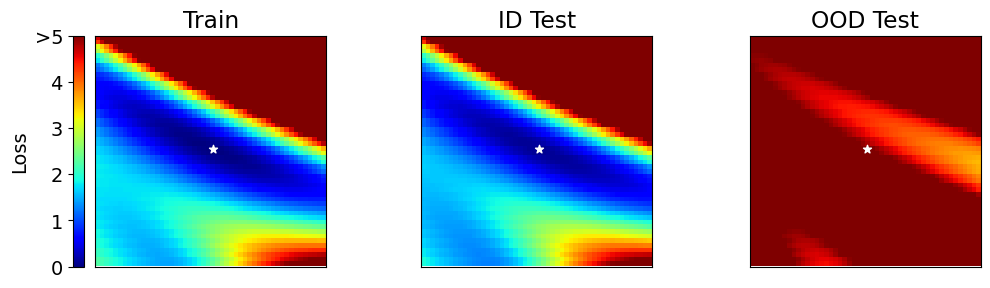

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))

####

h = ax[0].imshow(bandgap_F_train_ll[:, 1:], origin='lower', cmap=cmap_name, vmin=cbar_min, vmax=cbar_max)

ax[0].set_title('Train')
ax[0].set_xticks(())
ax[0].set_yticks(())

ax[1].imshow(bandgap_F_id_ll[:, 1:], origin='lower', cmap=cmap_name, vmin=cbar_min, vmax=cbar_max)
ax[1].set_title('ID Test')
ax[1].set_xticks(())
ax[1].set_yticks(())


ax[2].imshow(bandgap_F_ood_ll[:, 1:], origin='lower', cmap=cmap_name, vmin=cbar_min, vmax=cbar_max)
ax[2].set_title('OOD Test')
ax[2].set_xticks(())
ax[2].set_yticks(())

ax[0].scatter(25, 25, color='white', marker='*', )
ax[1].scatter(25, 25, color='white', marker='*', )
ax[2].scatter(25, 25, color='white', marker='*', )

# ax[3].imshow(np.abs(bandgap_F_id_ll[:, 1:] - bandgap_F_ood_ll[:, 1:]), origin='lower', cmap=cmap_name, vmin=cbar_min, vmax=cbar_max)
# ax[3].set_title('Abs. Difference')
# ax[3].set_xticks(())
# ax[3].set_yticks(())
cbar = plt.colorbar(mappable=h, ax=ax[0], fraction=0.046, pad=0.04, location='left')
cbar.ax.set_yticks((0, 1, 2, 3, 4, 5))
cbar.ax.set_yticklabels(y_tick_labels)
cbar.ax.set_ylabel('Loss', rotation=90)
plt.savefig('paper1_fig/bandgap_F_loss_landscapes.png', bbox_inches='tight')

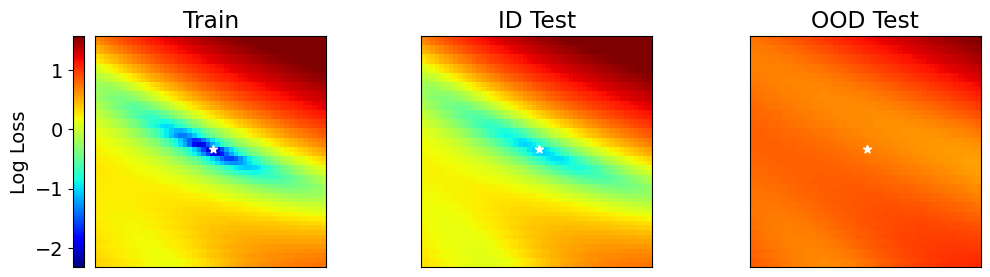

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))

####
log_min = np.amin(np.log10(bandgap_F_train_ll[:, 1:]))
log_max = np.amax(np.log10(bandgap_F_ood_ll[:, 1:]))

h = ax[0].imshow(np.log10(bandgap_F_train_ll[:, 1:]), origin='lower', cmap=cmap_name, vmin=log_min, vmax=log_max)

ax[0].set_title('Train')
ax[0].set_xticks(())
ax[0].set_yticks(())

ax[1].imshow(np.log10(bandgap_F_id_ll[:, 1:]), origin='lower', cmap=cmap_name, vmin=log_min, vmax=log_max)
ax[1].set_title('ID Test')
ax[1].set_xticks(())
ax[1].set_yticks(())


ax[2].imshow(np.log10(bandgap_F_ood_ll[:, 1:]), origin='lower', cmap=cmap_name, vmin=log_min, vmax=log_max)
ax[2].set_title('OOD Test')
ax[2].set_xticks(())
ax[2].set_yticks(())

ax[0].scatter(25, 25, color='white', marker='*', )
ax[1].scatter(25, 25, color='white', marker='*', )
ax[2].scatter(25, 25, color='white', marker='*', )

# ax[3].imshow(np.abs(bandgap_F_id_ll[:, 1:] - bandgap_F_ood_ll[:, 1:]), origin='lower', cmap=cmap_name, vmin=cbar_min, vmax=cbar_max)
# ax[3].set_title('Abs. Difference')
# ax[3].set_xticks(())
# ax[3].set_yticks(())
cbar = plt.colorbar(mappable=h, ax=ax[0], fraction=0.046, pad=0.04, location='left')
cbar.ax.set_ylabel('Log Loss', rotation=90)
# cbar.ax.set_yticks((0, 1, 2, 3, 4, 5))
# cbar.ax.set_yticklabels(y_tick_labels)
plt.savefig('paper1_fig/bandgap_F_loss_landscapes_logscale.png', bbox_inches='tight')

In [11]:
np.amin(bandgap_F_ood_ll[:, 1:])

3.5658798

The wasserstein distance is 1.1669353851078914
The mean ID uncertainty is 1.252437874712634
The mean OOD uncertainty is 1.1622381370128227


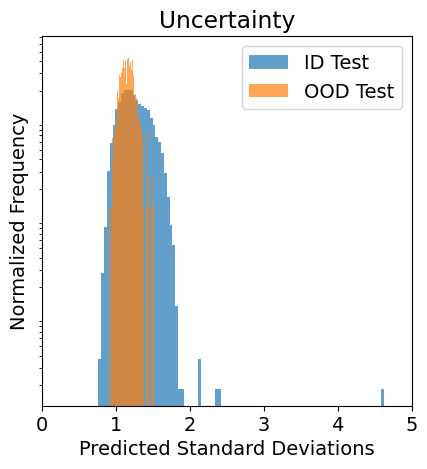

In [65]:
print(f"The wasserstein distance is {wasserstein_distance(bandgap_F_id_hist, bandgap_F_ood_hist)}")
print(f"The mean ID uncertainty is {np.mean(bgap_F_id_std)}")
print(f"The mean OOD uncertainty is {np.mean(bgap_F_ood_std)}")
fig, ax = plt.subplots(1, 1)
ax.set_box_aspect(1)

ax.set_title('Uncertainty')
ax.set_ylabel('Normalized Frequency')
ax.set_xlabel('Predicted Standard Deviations')

ax.stairs(bandgap_F_id_hist, edges=bandgap_F_id_bins, fill=True, label='ID Test', alpha=0.7)
ax.stairs(bandgap_F_ood_hist, edges=bandgap_F_ood_bins, fill=True, label='OOD Test', alpha=0.7)
ax.set_xlim((0, 5))
ax.set_yscale('log')
ax.set_yticks(())
ax.legend()
plt.savefig('paper1_fig/bandgap_F_uncert_hist.png', bbox_inches='tight')

In [13]:
bandgap_Fe_train_ll = move_landscape_to_cpu(bandgap_Fe_train_ll[:, 1:])

1.9350653061224474
1.9608036236026645
2.176821424521866


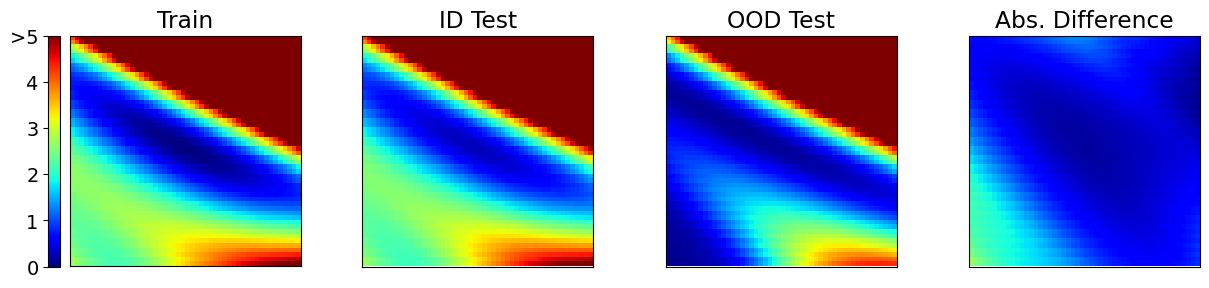

In [14]:
fig, ax = plt.subplots(1, 4, figsize=(15,3))
####

ax[0].imshow(bandgap_Fe_train_ll, origin='lower', cmap=cmap_name, vmin=cbar_min, vmax=cbar_max)
ax[0].set_title('Train')
ax[0].set_xticks(())
ax[0].set_yticks(())
ax[0].set_title('Train')
print(estimate_surf_vol(x_range=(-0.5, 0.5), y_range=(-0.5, 0.5), z_array=np.array(bandgap_Fe_train_ll)))

h = ax[1].imshow(bandgap_Fe_id_ll[:, 1:], origin='lower', cmap='jet', vmin=cbar_min, vmax=cbar_max)
ax[1].set_xticks(())
ax[1].set_yticks(())
ax[1].set_title('ID Test')
print(estimate_surf_vol(x_range=(-0.5, 0.5), y_range=(-0.5, 0.5), z_array=bandgap_Fe_id_ll[:, 1:]))

ax[2].imshow(bandgap_Fe_ood_ll[:, 1:], origin='lower', cmap='jet', vmin=cbar_min, vmax=cbar_max)
ax[2].set_xticks(())
ax[2].set_yticks(())
ax[2].set_title('OOD Test')
print(estimate_surf_vol(x_range=(-0.5, 0.5), y_range=(-0.5, 0.5), z_array=bandgap_Fe_ood_ll[:, 1:]))

ax[3].imshow(np.abs(bandgap_Fe_id_ll[:, 1:] - bandgap_Fe_ood_ll[:, 1:]), origin='lower', cmap='jet', vmin=cbar_min, vmax=cbar_max)
ax[3].set_xticks(())
ax[3].set_yticks(())
ax[3].set_title('Abs. Difference')


cbar = plt.colorbar(mappable=h, ax=ax[0], fraction=0.046, pad=0.04, location='left')
cbar.ax.set_yticks((0, 1, 2, 3, 4, 5))
cbar.ax.set_yticklabels(y_tick_labels)

plt.savefig('paper1_fig/bandgap_Fe_loss_landscapes.png', bbox_inches='tight')
plt.show()

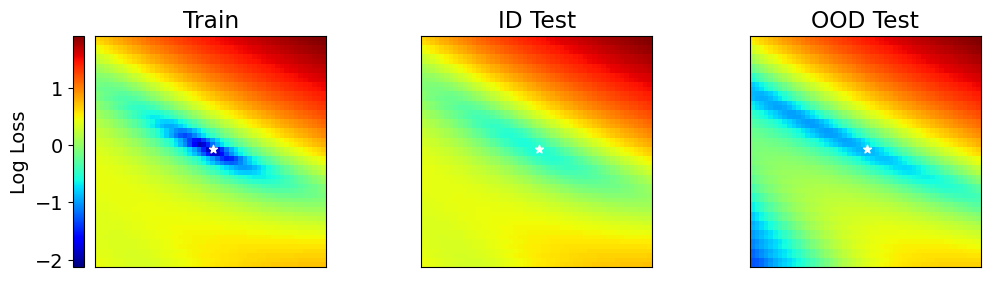

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))
####
log_min = np.amin(np.log10(bandgap_Fe_train_ll))
log_max = np.amax(np.log10(bandgap_Fe_train_ll))

ax[0].imshow(np.log10(bandgap_Fe_train_ll), origin='lower', cmap=cmap_name, vmin=log_min, vmax=log_max)
ax[0].set_title('Train')
ax[0].set_xticks(())
ax[0].set_yticks(())
ax[0].set_title('Train')

h = ax[1].imshow(np.log10(bandgap_Fe_id_ll[:, 1:]), origin='lower', cmap='jet', vmin=log_min, vmax=log_max)
ax[1].set_xticks(())
ax[1].set_yticks(())
ax[1].set_title('ID Test')

ax[2].imshow(np.log10(bandgap_Fe_ood_ll[:, 1:]), origin='lower', cmap='jet', vmin=log_min, vmax=log_max)
ax[2].set_xticks(())
ax[2].set_yticks(())
ax[2].set_title('OOD Test')

ax[0].scatter(25, 25, color='white', marker='*', )
ax[1].scatter(25, 25, color='white', marker='*', )
ax[2].scatter(25, 25, color='white', marker='*', )

# ax[3].imshow(np.abs(bandgap_Fe_id_ll[:, 1:] - bandgap_Fe_ood_ll[:, 1:]), origin='lower', cmap='jet', vmin=cbar_min, vmax=cbar_max)
# ax[3].set_xticks(())
# ax[3].set_yticks(())
# ax[3].set_title('Abs. Difference')

cbar = plt.colorbar(mappable=h, ax=ax[0], fraction=0.046, pad=0.04, location='left')
cbar.ax.set_ylabel('Log Loss', rotation=90)
# cbar.ax.set_yticks((0, 1, 2, 3, 4, 5))
# cbar.ax.set_yticklabels(y_tick_labels)

plt.savefig('paper1_fig/bandgap_Fe_loss_landscapes_logscale.png', bbox_inches='tight')
plt.show()

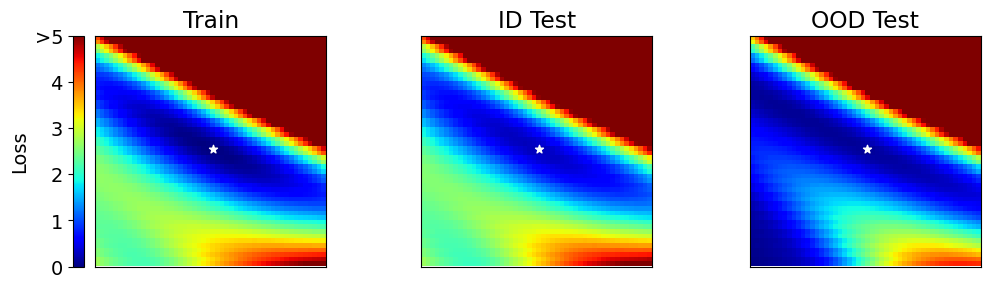

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))
####

ax[0].imshow(bandgap_Fe_train_ll, origin='lower', cmap=cmap_name, vmin=cbar_min, vmax=cbar_max)
ax[0].set_title('Train')
ax[0].set_xticks(())
ax[0].set_yticks(())
ax[0].set_title('Train')

h = ax[1].imshow(bandgap_Fe_id_ll[:, 1:], origin='lower', cmap='jet', vmin=cbar_min, vmax=cbar_max)
ax[1].set_xticks(())
ax[1].set_yticks(())
ax[1].set_title('ID Test')

ax[2].imshow(bandgap_Fe_ood_ll[:, 1:], origin='lower', cmap='jet', vmin=cbar_min, vmax=cbar_max)
ax[2].set_xticks(())
ax[2].set_yticks(())
ax[2].set_title('OOD Test')

ax[0].scatter(25, 25, color='white', marker='*', )
ax[1].scatter(25, 25, color='white', marker='*', )
ax[2].scatter(25, 25, color='white', marker='*', )

# ax[3].imshow(np.abs(bandgap_Fe_id_ll[:, 1:] - bandgap_Fe_ood_ll[:, 1:]), origin='lower', cmap='jet', vmin=cbar_min, vmax=cbar_max)
# ax[3].set_xticks(())
# ax[3].set_yticks(())
# ax[3].set_title('Abs. Difference')

cbar = plt.colorbar(mappable=h, ax=ax[0], fraction=0.046, pad=0.04, location='left')
cbar.ax.set_yticks((0, 1, 2, 3, 4, 5))
cbar.ax.set_yticklabels(y_tick_labels)
cbar.ax.set_ylabel('Loss', rotation=90)

plt.savefig('paper1_fig/bandgap_Fe_loss_landscapes.png', bbox_inches='tight')
plt.show()

The wasserstein distance is 0.9663202844447334
The mean ID uncertainty is 1.3393682292606073
The mean OOD uncertainty is 1.1673492402638932


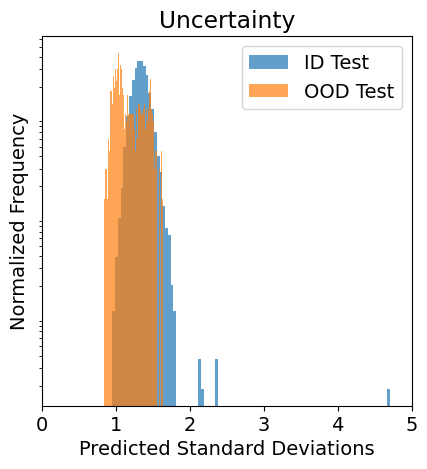

In [66]:
print(f"The wasserstein distance is {wasserstein_distance(bandgap_Fe_id_hist, bandgap_Fe_ood_hist)}")
print(f"The mean ID uncertainty is {np.mean(bgap_Fe_id_std)}")
print(f"The mean OOD uncertainty is {np.mean(bgap_Fe_ood_std)}")

fig, ax = plt.subplots(1, 1)
ax.set_box_aspect(1)
# ax[3].annotate('Bandgap Fe', xy = (0.0, 0.22), xycoords='figure fraction', weight='bold')
ax.set_title('Uncertainty')
ax.set_ylabel('Normalized Frequency')
ax.set_xlabel('Predicted Standard Deviations')
ax.stairs(bandgap_Fe_id_hist, edges=bandgap_Fe_id_bins, fill=True, label='ID Test', alpha=0.7)
ax.stairs(bandgap_Fe_ood_hist, edges=bandgap_Fe_ood_bins, fill=True, label='OOD Test', alpha=0.7)
ax.set_yscale('log')
ax.set_xlim((0, 5))
ax.legend()
ax.set_box_aspect(1)
ax.set_yticks(())
plt.savefig('paper1_fig/bandgap_Fe_uncert_hist.png', bbox_inches='tight')


# Enthalpy

In [18]:
cbar_min = 0
cbar_max = 2
cmap_name = 'jet'
y_tick_labels = ['0', '1', '>2']

-0.1085587572543524
-0.04549024883394408
-0.2921245195002081


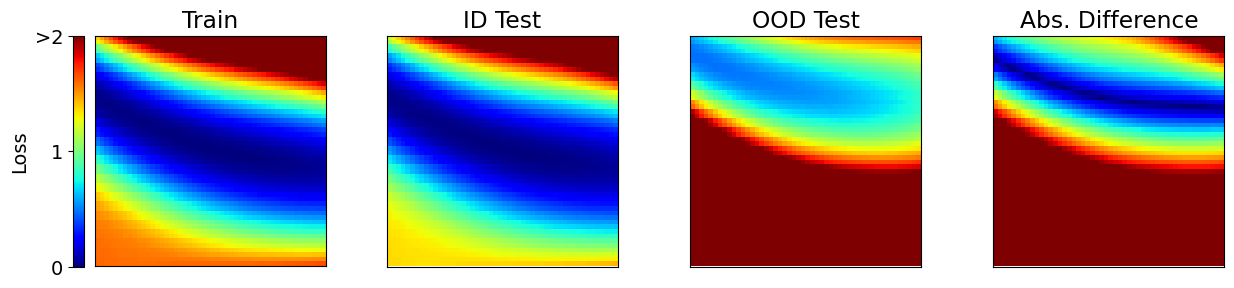

In [19]:
fig, ax = plt.subplots(1, 4, figsize=(15,3))

####

ax[0].imshow(eform_F_train_ll[:, 1:], origin='lower', cmap=cmap_name, vmin=cbar_min, vmax=cbar_max)
ax[0].set_title('Train')
ax[0].set_xticks(())
ax[0].set_yticks(())
ax[0].set_title('Train')
print(estimate_surf_vol(x_range=(-0.5, 0.5), y_range=(-0.5, 0.5), z_array=np.array(eform_F_train_ll[:, 1:])))

ax[1].set_title('ID Test')
ax[1].imshow(eform_F_id_ll[:, 1:], origin='lower', cmap=cmap_name, vmin=cbar_min, vmax=cbar_max)
ax[1].set_xticks(())
ax[1].set_yticks(())
print(estimate_surf_vol(x_range=(-0.5, 0.5), y_range=(-0.5, 0.5), z_array=np.array(eform_F_id_ll[:, 1:])))

ax[2].set_title('OOD Test')
ax[2].imshow(eform_F_ood_ll[:, 1:], origin='lower', cmap=cmap_name, vmin=cbar_min, vmax=cbar_max)
ax[2].set_xticks(())
ax[2].set_yticks(())
print(estimate_surf_vol(x_range=(-0.5, 0.5), y_range=(-0.5, 0.5), z_array=np.array(eform_F_ood_ll[:, 1:])))

ax[3].set_title('Abs. Difference')
h = ax[3].imshow(np.abs(eform_F_id_ll[:, 1:] - eform_F_ood_ll[:, 1:]), origin='lower', cmap=cmap_name, vmin=cbar_min, vmax=cbar_max)
ax[3].set_xticks(())
ax[3].set_yticks(())
cbar = plt.colorbar(mappable=h, ax=ax[0], fraction=0.046, pad=0.04, location='left')
cbar.ax.set_yticks((0, 1, 2,))
cbar.ax.set_yticklabels(y_tick_labels)
cbar.ax.set_ylabel('Loss', rotation=90)
plt.savefig('paper1_fig/eform_F_loss_landscapes.png', bbox_inches='tight')
####

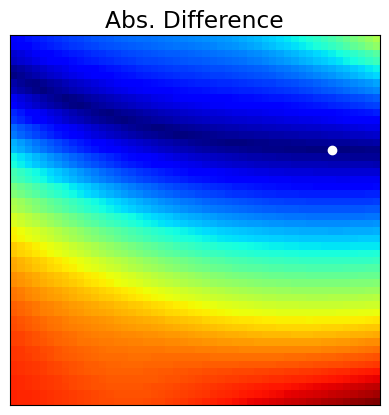

In [20]:
diff_id_ood = np.abs(eform_F_id_ll[:, 1:] - eform_F_ood_ll[:, 1:])

min_val = np.amin(diff_id_ood)
coords = np.argwhere(diff_id_ood == min_val)

fig, ax = plt.subplots(1, 1)
ax.set_title('Abs. Difference')
h = ax.imshow(diff_id_ood, origin='lower', cmap=cmap_name)
ax.scatter(coords[0][1], coords[0][0], color='white')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

In [21]:
eform_F_ood_ll[35, 43]

0.6801606

In [22]:
eform_F_id_ll[35, 43]

0.79359597

In [23]:
np.amin(eform_F_id_ll[:, 1:])

0.0034712402

In [24]:
eform_F_ood_ll[25, 26]

1.4694151

In [25]:
np.amin(eform_F_ood_ll[:, 1:])

0.47074363

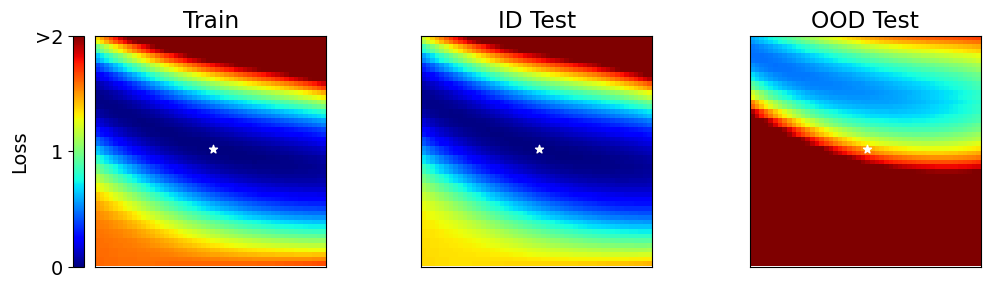

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))

####
h = ax[0].imshow(eform_F_train_ll[:, 1:], origin='lower', cmap=cmap_name, vmin=cbar_min, vmax=cbar_max)
ax[0].set_title('Train')
ax[0].set_xticks(())
ax[0].set_yticks(())
ax[0].set_title('Train')

ax[1].set_title('ID Test')
ax[1].imshow(eform_F_id_ll[:, 1:], origin='lower', cmap=cmap_name, vmin=cbar_min, vmax=cbar_max)
ax[1].set_xticks(())
ax[1].set_yticks(())

ax[2].set_title('OOD Test')
ax[2].imshow(eform_F_ood_ll[:, 1:], origin='lower', cmap=cmap_name, vmin=cbar_min, vmax=cbar_max)
ax[2].set_xticks(())
ax[2].set_yticks(())

ax[0].scatter(25, 25, color='white', marker='*', )
ax[1].scatter(25, 25, color='white', marker='*', )
ax[2].scatter(25, 25, color='white', marker='*', )

# ax[3].set_title('Abs. Difference')
# ax[3].imshow(np.abs(eform_F_id_ll[:, 1:] - eform_F_ood_ll[:, 1:]), origin='lower', cmap=cmap_name, vmin=cbar_min, vmax=cbar_max)
# ax[3].set_xticks(())
# ax[3].set_yticks(())
cbar = plt.colorbar(mappable=h, ax=ax[0], fraction=0.046, pad=0.04, location='left')
cbar.ax.set_yticks((0, 1, 2))
cbar.ax.set_yticklabels(y_tick_labels)
cbar.ax.set_ylabel('Loss', rotation=90)

plt.savefig('paper1_fig/eform_F_loss_landscapes.png', bbox_inches='tight')
####

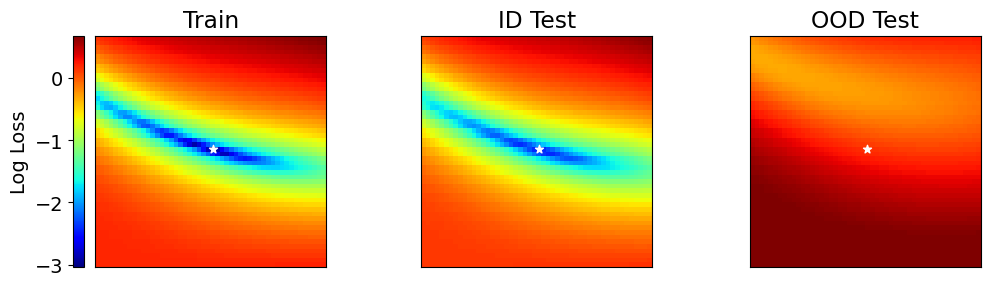

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))

log_min = np.amin(np.log10(eform_F_train_ll[:, 1:]))
log_max = np.amax(np.log10(eform_F_train_ll[:, 1:]))
####
h = ax[0].imshow(np.log10(eform_F_train_ll[:, 1:]), origin='lower', cmap=cmap_name, vmin=log_min, vmax=log_max)
ax[0].set_title('Train')
ax[0].set_xticks(())
ax[0].set_yticks(())
ax[0].set_title('Train')

ax[1].set_title('ID Test')
ax[1].imshow(np.log10(eform_F_id_ll[:, 1:]), origin='lower', cmap=cmap_name, vmin=log_min, vmax=log_max)
ax[1].set_xticks(())
ax[1].set_yticks(())

ax[2].set_title('OOD Test')
ax[2].imshow(np.log10(eform_F_ood_ll[:, 1:]), origin='lower', cmap=cmap_name, vmin=log_min, vmax=log_max)
ax[2].set_xticks(())
ax[2].set_yticks(())

ax[0].scatter(25, 25, color='white', marker='*', )
ax[1].scatter(25, 25, color='white', marker='*', )
ax[2].scatter(25, 25, color='white', marker='*', )

# ax[3].set_title('Abs. Difference')
# ax[3].imshow(np.abs(eform_F_id_ll[:, 1:] - eform_F_ood_ll[:, 1:]), origin='lower', cmap=cmap_name, vmin=cbar_min, vmax=cbar_max)
# ax[3].set_xticks(())
# ax[3].set_yticks(())
cbar = plt.colorbar(mappable=h, ax=ax[0], fraction=0.046, pad=0.04, location='left')
# cbar.ax.set_yticks((0, 1, 2)) 
# cbar.ax.set_yticklabels(y_tick_labels)
cbar.ax.set_ylabel('Log Loss', rotation=90)
plt.savefig('paper1_fig/eform_F_loss_landscapes_logscale.png', bbox_inches='tight')
####

In [28]:
ood_min = np.amin(eform_F_ood_ll[:, 1:])
ood_min_coords = np.argwhere(eform_F_ood_ll[:, 1:] == ood_min)[0]
print(ood_min_coords)

[45  1]


In [29]:
ood_min

0.47074363

In [30]:
np.amin(eform_F_id_ll[:, 1:])

0.0034712402

In [31]:
eform_F_id_ll[45,2]

0.63679695

The wasserstein distance is 1.0227869203882878
The mean ID uncertainty is 0.7323560105638939
The mean OOD uncertainty is 0.8772631463955985


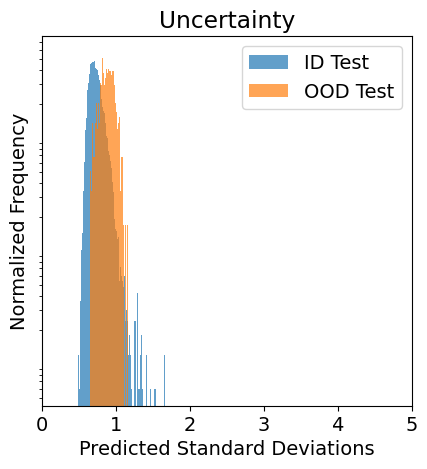

In [61]:
print(f"The wasserstein distance is {wasserstein_distance(eform_F_id_hist, eform_F_ood_hist)}")
print(f"The mean ID uncertainty is {np.mean(eform_F_id_std)}")
print(f"The mean OOD uncertainty is {np.mean(eform_F_ood_std)}")


fig, ax = plt.subplots(1, 1)
ax.set_box_aspect(1)
# ax[2, 0].hist(np.std(eform_F_id_uncertainty, axis=0), bins=10)
# ax[2, 0].hist(np.std(eform_F_ood_uncertainty, axis=0), bins=10)
ax.set_title('Uncertainty')
# ax[0].annotate('Enthalpy F', xy = (0, 0.65), xycoords='figure fraction', weight='bold')
ax.set_ylabel('Normalized Frequency')
ax.set_xlabel('Predicted Standard Deviations')
ax.stairs(eform_F_id_hist, edges=eform_F_id_bins, fill=True, label='ID Test', alpha=0.7)
ax.stairs(eform_F_ood_hist, edges=eform_F_ood_bins, fill=True, label='OOD Test', alpha=0.7)
ax.legend()
ax.set_yscale('log')
ax.set_xlim((0, 5))
ax.set_yticks(())
ax.set_yticklabels(())
ax.set_box_aspect(1)
plt.tick_params(left=False)
plt.savefig('paper1_fig/eform_F_uncert_hist.png', bbox_inches='tight')

0.03313130314227397
0.041718030253352655
0.03775618615739271


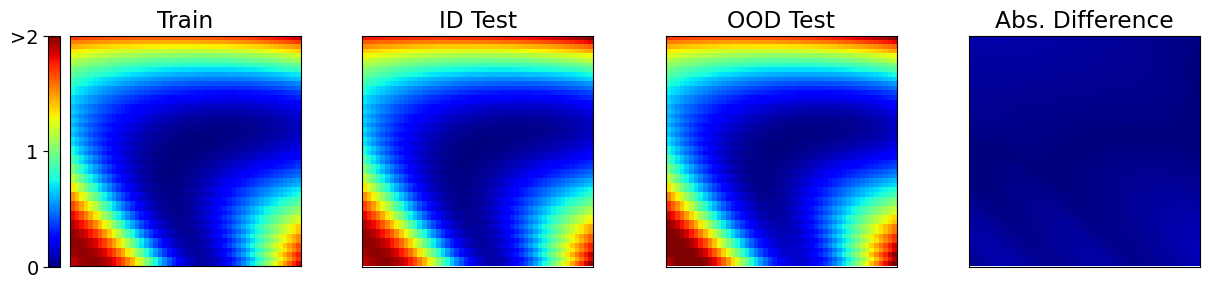

In [33]:
fig, ax = plt.subplots(1, 4, figsize=(15,3))

h = ax[0].imshow(eform_Fe_train_ll[:, 1:], origin='lower', cmap=cmap_name, vmin=cbar_min, vmax=cbar_max)
ax[0].set_title('Train')
ax[0].set_xticks(())
ax[0].set_yticks(())
ax[0].set_title('Train')
print(estimate_surf_vol(x_range=(-0.5, 0.5), y_range=(-0.5, 0.5), z_array=np.array(eform_Fe_train_ll[:, 1:])))

ax[1].set_title('ID Test')
ax[1].imshow(eform_Fe_id_ll[:, 1:],  origin='lower', cmap='jet', vmin=cbar_min, vmax=cbar_max)
ax[1].set_xticks(())
ax[1].set_yticks(())
print(estimate_surf_vol(x_range=(-0.5, 0.5), y_range=(-0.5, 0.5), z_array=np.array(eform_Fe_id_ll[:, 1:])))

ax[2].set_title('OOD Test')
ax[2].imshow(eform_Fe_ood_ll[:, 1:],  origin='lower', cmap='jet', vmin=cbar_min, vmax=cbar_max)
ax[2].set_xticks(())
ax[2].set_yticks(())
print(estimate_surf_vol(x_range=(-0.5, 0.5), y_range=(-0.5, 0.5), z_array=np.array(eform_Fe_ood_ll[:, 1:])))

ax[3].set_title('Abs. Difference')
ax[3].imshow(np.abs(eform_Fe_id_ll[:, 1:] - eform_Fe_ood_ll[:, 1:]), origin='lower', cmap='jet', vmin=cbar_min, vmax=cbar_max)
ax[3].set_xticks(())
ax[3].set_yticks(())

cbar = plt.colorbar(mappable=h, ax=ax[0], fraction=0.046, pad=0.04, location='left')
cbar.ax.set_yticks((0, 1, 2))
cbar.ax.set_yticklabels(y_tick_labels)
plt.savefig('paper1_fig/eform_Fe_loss_landscapes.png', bbox_inches='tight')
plt.show()

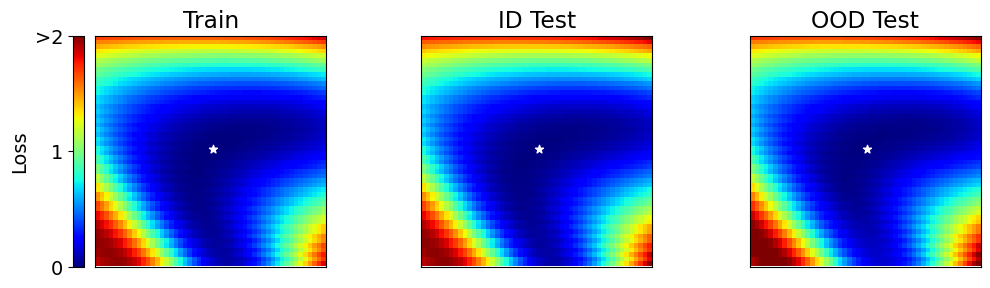

In [34]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))

h = ax[0].imshow(eform_Fe_train_ll[:, 1:], origin='lower', cmap=cmap_name, vmin=cbar_min, vmax=cbar_max)
ax[0].set_title('Train')
ax[0].set_xticks(())
ax[0].set_yticks(())
ax[0].set_title('Train')

ax[1].set_title('ID Test')
ax[1].imshow(eform_Fe_id_ll[:, 1:],  origin='lower', cmap='jet', vmin=cbar_min, vmax=cbar_max)
ax[1].set_xticks(())
ax[1].set_yticks(())

ax[2].set_title('OOD Test')
ax[2].imshow(eform_Fe_ood_ll[:, 1:],  origin='lower', cmap='jet', vmin=cbar_min, vmax=cbar_max)
ax[2].set_xticks(())
ax[2].set_yticks(())

# ax[3].set_title('Abs. Difference')
# ax[3].imshow(np.abs(eform_Fe_id_ll[:, 1:] - eform_Fe_ood_ll[:, 1:]), origin='lower', cmap='jet', vmin=cbar_min, vmax=cbar_max)
# ax[3].set_xticks(())
# ax[3].set_yticks(())

ax[0].scatter(25, 25, color='white', marker='*', )
ax[1].scatter(25, 25, color='white', marker='*', )
ax[2].scatter(25, 25, color='white', marker='*', )

cbar = plt.colorbar(mappable=h, ax=ax[0], fraction=0.046, pad=0.04, location='left')
cbar.ax.set_yticks((0, 1, 2))
cbar.ax.set_yticklabels(y_tick_labels)
cbar.ax.set_ylabel('Loss', rotation=90)
plt.savefig('paper1_fig/eform_Fe_loss_landscapes.png', bbox_inches='tight')
plt.show()

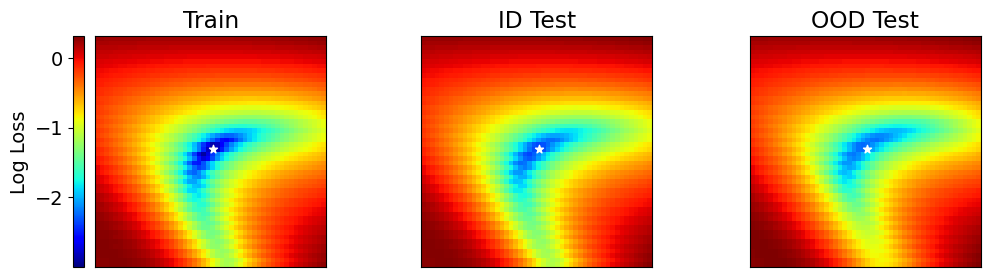

In [35]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))

log_max = np.amax(np.log10(eform_Fe_ood_ll[:, 1:]))
log_min = np.amin(np.log10(eform_Fe_train_ll[:, 1:]))

h = ax[0].imshow(np.log10(eform_Fe_train_ll[:, 1:]), origin='lower', cmap=cmap_name, vmin=log_min, vmax=log_max)
ax[0].set_title('Train')
ax[0].set_xticks(())
ax[0].set_yticks(())
ax[0].set_title('Train')

ax[1].set_title('ID Test')
ax[1].imshow(np.log10(eform_Fe_id_ll[:, 1:]),  origin='lower', cmap='jet', vmin=log_min, vmax=log_max)
ax[1].set_xticks(())
ax[1].set_yticks(())

ax[2].set_title('OOD Test')
ax[2].imshow(np.log10(eform_Fe_ood_ll[:, 1:]),  origin='lower', cmap='jet', vmin=log_min, vmax=log_max)
ax[2].set_xticks(())
ax[2].set_yticks(())

# ax[3].set_title('Abs. Difference')
# ax[3].imshow(np.abs(eform_Fe_id_ll[:, 1:] - eform_Fe_ood_ll[:, 1:]), origin='lower', cmap='jet', vmin=cbar_min, vmax=cbar_max)
# ax[3].set_xticks(())
# ax[3].set_yticks(())

ax[0].scatter(25, 25, color='white', marker='*', )
ax[1].scatter(25, 25, color='white', marker='*', )
ax[2].scatter(25, 25, color='white', marker='*', )

cbar = plt.colorbar(mappable=h, ax=ax[0], fraction=0.046, pad=0.04, location='left')
# cbar.ax.set_yticks((0, 1, 2))
# cbar.ax.set_yticklabels(y_tick_labels)
cbar.ax.set_ylabel('Log Loss', rotation=90)
plt.savefig('paper1_fig/eform_Fe_loss_landscapes_logscale.png', bbox_inches='tight')
plt.show()

The wasserstein distance is 0.43595549097620856
The mean ID uncertainty is 0.6370333344784697
The mean OOD uncertainty is 0.7765564854837803


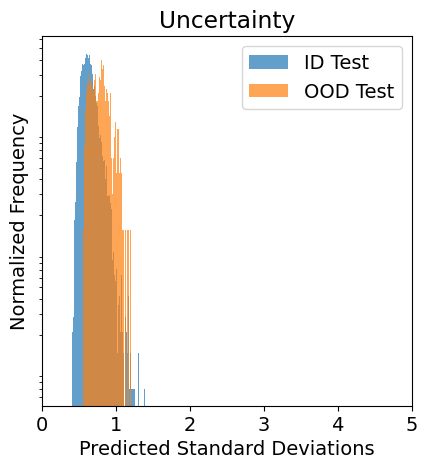

In [62]:
print(f"The wasserstein distance is {wasserstein_distance(eform_Fe_id_hist, eform_Fe_ood_hist)}")
print(f"The mean ID uncertainty is {np.mean(eform_Fe_id_std)}")
print(f"The mean OOD uncertainty is {np.mean(eform_Fe_ood_std)}")

fig, ax = plt.subplots(1, 1)
ax.set_box_aspect(1)
ax.set_title('Uncertainty')
ax.set_ylabel('Normalized Frequency')
ax.set_xlabel('Predicted Standard Deviations')
ax.stairs(eform_Fe_id_hist, edges=eform_Fe_id_bins, fill=True, label='ID Test', alpha=0.7)
ax.stairs(eform_Fe_ood_hist, edges=eform_Fe_ood_bins, fill=True, label='OOD Test', alpha=0.7)
ax.legend()
ax.set_yscale('log')
ax.set_xlim((0, 5))
ax.set_yticks(())
ax.set_box_aspect(1)
plt.savefig('paper1_fig/eform_Fe_uncert_hist.png', bbox_inches='tight')

# Parity Plots

In [37]:
bgap_F_id_gt = pd.read_csv('alignn25_jarvis22/0/alignn25_jarvis22_bandgap_elements_F_1.00_0.00_0/y_test_id.csv')
bgap_F_id_pred = pd.read_csv('alignn25_jarvis22/0/alignn25_jarvis22_bandgap_elements_F_1.00_0.00_0/y_pred_id.csv')

bgap_F_ood_gt = pd.read_csv('alignn25_jarvis22/0/alignn25_jarvis22_bandgap_elements_F_1.00_0.00_0/y_test_ood.csv')
bgap_F_ood_pred = pd.read_csv('alignn25_jarvis22/0/alignn25_jarvis22_bandgap_elements_F_1.00_0.00_0/y_pred_ood.csv')

bgap_Fe_id_gt = pd.read_csv('alignn25_jarvis22/0/alignn25_jarvis22_bandgap_elements_Fe_1.00_0.00_0/y_test_id.csv')
bgap_Fe_id_pred = pd.read_csv('alignn25_jarvis22/0/alignn25_jarvis22_bandgap_elements_Fe_1.00_0.00_0/y_pred_id.csv')

bgap_Fe_ood_gt = pd.read_csv('alignn25_jarvis22/0/alignn25_jarvis22_bandgap_elements_Fe_1.00_0.00_0/y_test_ood.csv')
bgap_Fe_ood_pred = pd.read_csv('alignn25_jarvis22/0/alignn25_jarvis22_bandgap_elements_Fe_1.00_0.00_0/y_pred_ood.csv')

In [38]:
eform_F_id_gt = pd.read_csv('alignn25_jarvis22/0/alignn25_jarvis22_e_form_elements_F_1.00_0.00_0/y_test_id.csv')
eform_F_id_pred = pd.read_csv('alignn25_jarvis22/0/alignn25_jarvis22_e_form_elements_F_1.00_0.00_0/y_pred_id.csv')

eform_F_ood_gt = pd.read_csv('alignn25_jarvis22/0/alignn25_jarvis22_e_form_elements_F_1.00_0.00_0/y_test_ood.csv')
eform_F_ood_pred = pd.read_csv('alignn25_jarvis22/0/alignn25_jarvis22_e_form_elements_F_1.00_0.00_0/y_pred_ood.csv')

eform_Fe_id_gt = pd.read_csv('alignn25_jarvis22/0/alignn25_jarvis22_e_form_elements_Fe_1.00_0.00_0/y_test_id.csv')
eform_Fe_id_pred = pd.read_csv('alignn25_jarvis22/0/alignn25_jarvis22_e_form_elements_Fe_1.00_0.00_0/y_pred_id.csv')

eform_Fe_ood_gt = pd.read_csv('alignn25_jarvis22/0/alignn25_jarvis22_e_form_elements_Fe_1.00_0.00_0/y_test_ood.csv')
eform_Fe_ood_pred = pd.read_csv('alignn25_jarvis22/0/alignn25_jarvis22_e_form_elements_Fe_1.00_0.00_0/y_pred_ood.csv')

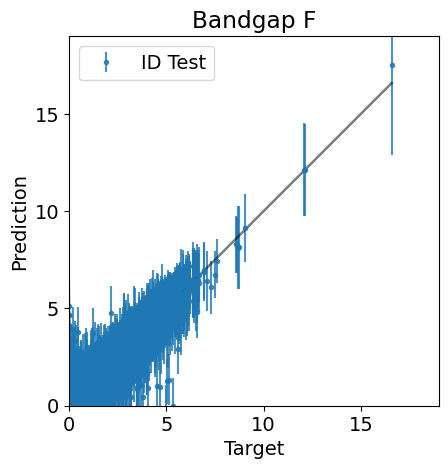

In [39]:
fig, ax = plt.subplots(1, 1)
ax.set_box_aspect(1)
ax.axis('equal')
ax.set_xlabel('Target')
ax.set_ylabel('Prediction')
ax.set_xticks([0, 5, 10, 15, 20])
ax.set_yticks([0, 5, 10, 15, 20])
ax.set_xlim((0, 19))
ax.set_ylim(0, 19)

ax.errorbar(bgap_F_id_gt['bandgap'].values, bgap_F_id_pred['bandgap'].values, yerr=bgap_F_id_std, fmt='.', alpha=0.8)
plt.legend(['ID Test'])
ax.plot(bgap_F_id_gt['bandgap'].values, bgap_F_id_gt['bandgap'].values, 'k-', alpha=0.5, label=None)
plt.title('Bandgap F')
plt.savefig('paper1_fig/bandgap_F_id_parity_w_err.png', bbox_inches='tight')


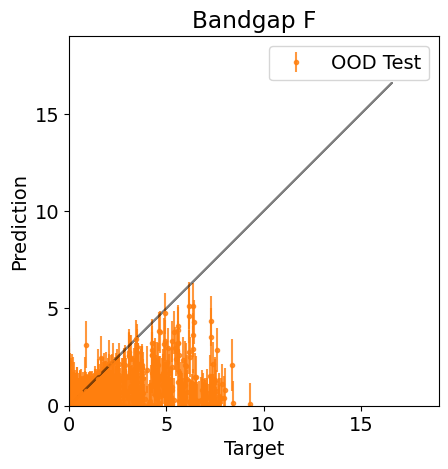

In [40]:
fig, ax = plt.subplots(1, 1)
ax.set_box_aspect(1)
ax.axis('equal')
ax.set_xticks([0, 5, 10, 15, 20])
ax.set_yticks([0, 5, 10, 15, 20])
ax.set_xlim((0, 19))
ax.set_ylim(0, 19)

ax.set_xlabel('Target')
ax.set_ylabel('Prediction')
ax.errorbar(bgap_F_ood_gt['bandgap'].values, bgap_F_ood_pred['bandgap'].values, yerr=bgap_F_ood_std, fmt='.', alpha=0.8, c='C1')
plt.legend(['OOD Test'])
ax.plot(bgap_F_id_gt['bandgap'].values, bgap_F_id_gt['bandgap'].values, 'k-', alpha=0.5, label=None)
plt.title('Bandgap F')
plt.savefig('paper1_fig/bandgap_F_ood_parity_w_err.png', bbox_inches='tight')


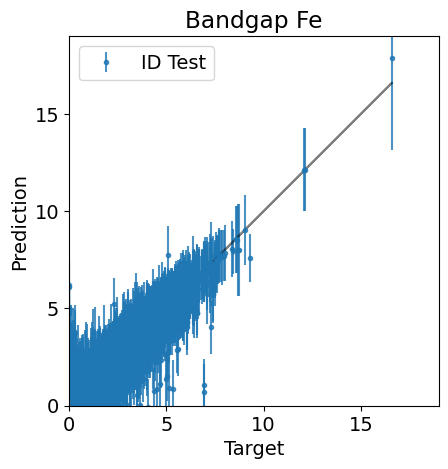

In [41]:
fig, ax = plt.subplots(1, 1)
ax.set_box_aspect(1)
ax.set_xticks([0, 5, 10, 15, 20])
ax.set_yticks([0, 5, 10, 15, 20])
ax.set_xlim((0, 19))
ax.set_ylim(0, 19)

ax.set_xlabel('Target')
ax.set_ylabel('Prediction')
ax.errorbar(bgap_Fe_id_gt['bandgap'].values, bgap_Fe_id_pred['bandgap'].values, yerr=bgap_Fe_id_std, fmt='.', alpha=0.8)
plt.legend(['ID Test'])
ax.plot(bgap_Fe_id_gt['bandgap'].values, bgap_Fe_id_gt['bandgap'].values, 'k-', alpha=0.5, label=None)
plt.title('Bandgap Fe')
plt.savefig('paper1_fig/bandgap_Fe_id_parity_w_err.png', bbox_inches='tight')

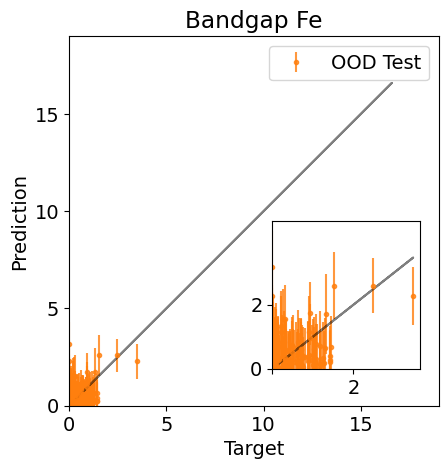

In [42]:
fig, ax = plt.subplots(1, 1)
ax.set_box_aspect(1)
ax.set_xticks([0, 5, 10, 15, 20])
ax.set_yticks([0, 5, 10, 15, 20])
ax.set_xlim((0, 19))
ax.set_ylim(0, 19)

ax.set_xlabel('Target')
ax.set_ylabel('Prediction')
ax.errorbar(bgap_Fe_ood_gt['bandgap'].values, bgap_Fe_ood_pred['bandgap'].values, yerr=bgap_Fe_ood_std, fmt='.', alpha=0.8, c='C1')
ins = ax.inset_axes([0.55,0.1,0.4,0.4])
ins.errorbar(bgap_Fe_ood_gt['bandgap'].values, bgap_Fe_ood_pred['bandgap'].values, yerr=bgap_Fe_ood_std, fmt='.', alpha=0.8, c='C1')
plt.legend(['OOD Test'])
ax.plot(bgap_Fe_id_gt['bandgap'].values, bgap_Fe_id_gt['bandgap'].values, 'k-', alpha=0.5, label=None)
ins.plot(bgap_Fe_ood_gt['bandgap'].values, bgap_Fe_ood_gt['bandgap'].values, 'k-', alpha=0.5, label=None)
ins.set_xlim((0.1, None))
ins.set_ylim((0.1, None))
ins.set_xticks([0, 2.])
ins.set_yticks([0, 2.])
ins.set_xticklabels([None, 2])


# ins.set_xlabel('Target')
# ins.set_ylabel('Prediction')

plt.title('Bandgap Fe')
plt.savefig('paper1_fig/bandgap_Fe_ood_parity_w_err.png', bbox_inches='tight')


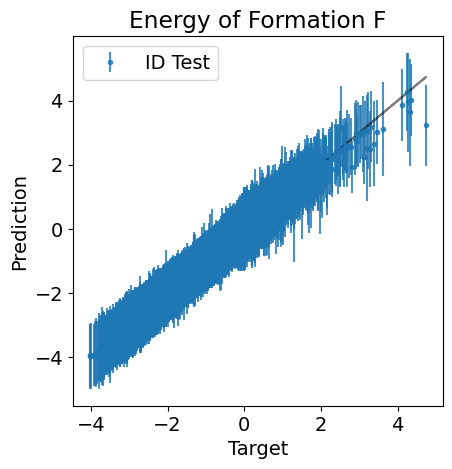

In [43]:
fig, ax = plt.subplots(1, 1)
ax.set_box_aspect(1)
ax.set_xticks([-4, -2, 0, 2, 4])
ax.set_yticks([-4, -2, 0, 2, 4])


ax.set_xlabel('Target')
ax.set_ylabel('Prediction')
ax.errorbar(eform_F_id_gt['e_form'].values, eform_F_id_pred['e_form'].values, yerr=eform_F_id_std, fmt='.', alpha=0.8)
plt.legend(['ID Test'])
ax.plot(eform_F_id_gt['e_form'].values, eform_F_id_gt['e_form'].values, 'k-', alpha=0.5, label=None)
plt.title('Energy of Formation F')
plt.savefig('paper1_fig/eform_F_id_parity_w_err.png', bbox_inches='tight')


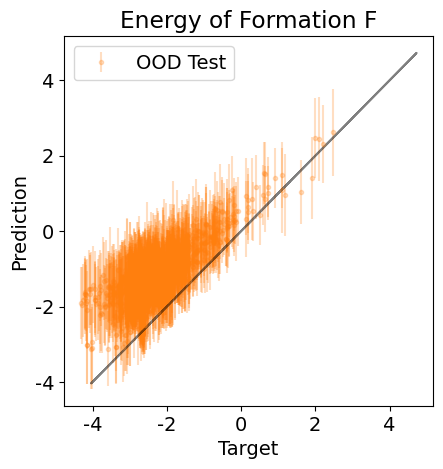

In [53]:
fig, ax = plt.subplots(1, 1)
ax.set_box_aspect(1)
ax.set_xlabel('Target')
ax.set_ylabel('Prediction')
ax.errorbar(eform_F_ood_gt['e_form'].values, eform_F_ood_pred['e_form'].values, yerr=eform_F_ood_std, fmt='.', alpha=0.25, c='C1')
plt.legend(['OOD Test'])
ax.plot(eform_F_id_gt['e_form'].values, eform_F_id_gt['e_form'].values, 'k-', alpha=0.5, label=None)
plt.title('Energy of Formation F')
ax.set_xticks([-4, -2, 0, 2, 4])
ax.set_yticks([-4, -2, 0, 2, 4])
ax.set_xticklabels([-4, -2, 0, 2, 4])
ax.set_yticklabels([-4, -2, 0, 2, 4])
plt.savefig('paper1_fig/eform_F_ood_parity_w_err.png', bbox_inches='tight')

plt.show()

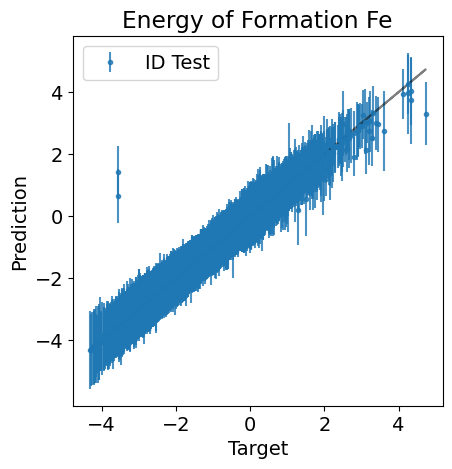

In [45]:
fig, ax = plt.subplots(1, 1)
ax.set_box_aspect(1)
ax.set_xticks([-4, -2, 0, 2, 4])
ax.set_yticks([-4, -2, 0, 2, 4])
ax.set_xlabel('Target')
ax.set_ylabel('Prediction')
ax.errorbar(eform_Fe_id_gt['e_form'].values, eform_Fe_id_pred['e_form'].values, yerr=eform_Fe_id_std, fmt='.', alpha=0.8)
plt.legend(['ID Test'])
ax.plot(eform_Fe_id_gt['e_form'].values, eform_Fe_id_gt['e_form'].values, 'k-', alpha=0.5, label=None)
plt.title('Energy of Formation Fe')
plt.savefig('paper1_fig/eform_Fe_id_parity_w_err.png', bbox_inches='tight')


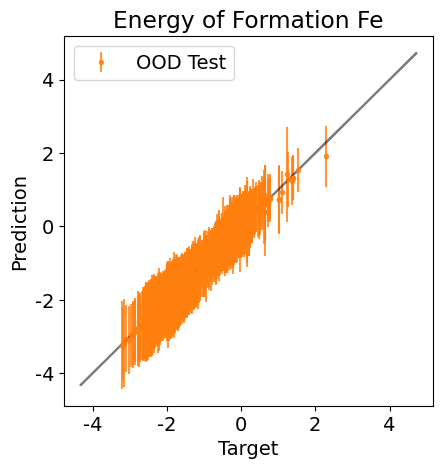

In [46]:
fig, ax = plt.subplots(1, 1)
ax.set_box_aspect(1)

ax.set_xlabel('Target')
ax.set_ylabel('Prediction')
ax.errorbar(eform_Fe_ood_gt['e_form'].values,eform_Fe_ood_pred['e_form'].values, yerr=eform_Fe_ood_std, fmt='.', alpha=0.8, c='C1')
plt.legend(['OOD Test'])
ax.plot(eform_Fe_id_gt['e_form'].values, eform_Fe_id_gt['e_form'].values, 'k-', alpha=0.5, label=None)
plt.title('Energy of Formation Fe')
ax.set_xticks([-4, -2, 0, 2, 4])
ax.set_yticks([-4, -2, 0, 2, 4])
ax.set_xticklabels([-4, -2, 0, 2, 4])
ax.set_yticklabels([-4, -2, 0, 2, 4])
plt.savefig('paper1_fig/eform_Fe_ood_parity_w_err.png', bbox_inches='tight')

plt.show()